<center><h1>Mini Project 2</h1></center>
<center><h2>Watchanan Chantapakul (<a href="mailto:wcgzm@umsystem.edu"><code>wcgzm</code></a>)</h2></center>
<hr />

In [1]:
%matplotlib inline
import numpy as np
import sympy
import scipy
from scipy import spatial
np.random.seed(7720)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

A two-class dataset has gaussian likelihood functions and priors $P(\omega_1) = 4P(\omega_2)$. Let the parameters of the likelihoods be $\mu_1 = \begin{pmatrix} 7 \\ 1 \end{pmatrix}$, $\mu_2 = \begin{pmatrix} 1 \\ 7 \end{pmatrix}$ and $\Sigma_1 = \Sigma_2 = \begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}$

In [2]:
C = 2 # number of classes
d = 2 # dimension
priors = [4/5, 1/5]
"P(𝜔1) = 4P(𝜔2)", priors[0] == 4 * priors[1]

('P(𝜔1) = 4P(𝜔2)', True)

In [3]:
means = np.array([[7, 1], [1, 7]])
"mu1", means[0], "mu2", means[1]

('mu1', array([7, 1]), 'mu2', array([1, 7]))

In [4]:
cov = np.zeros((C, d, d))
for c in range(C):
    cov[c]= np.array([[3.1, 0], [0, 2.6]])
"Sigma1, Sigma2 =", cov

('Sigma1, Sigma2 =',
 array([[[3.1, 0. ],
         [0. , 2.6]],
 
        [[3.1, 0. ],
         [0. , 2.6]]]))

# Question A
a) Write a generic Matlab function[<sup>1</sup>](#fn1) to compute the Mahalanobis distances between two arbitrary samples $\vec{x_1}$ and $\vec{x_2}$ or the distance between a sample $\vec{x_1}$ and the center of any given Gaussian distribution with covariance $\Sigma$, mean $\mu$, and dimension $d$.

<span id="fn1"><sup>1</sup> you may use any computer language/package, but you may NOT use any function other than the basic operations: i.e. +, -, *, / (for scalars, vectors, or matrices)</span>

## Solution

- $\mathbf{A}$ = a matrix
- $i$ = row
- $j$ = column

### $(i, j)$-Minor of a Matrix
$$ \mathbf{M}_{i, j} = \operatorname{det}((\mathbf{A}_{p, q})_{p \neq i, q \neq j}) = |(\mathbf{A}_{p, q})_{p \neq i, q \neq j}| $$

In [5]:
def submatrix(A, i, j):
    B = []
    for row in A[:i] + A[i+1:]:
        B.append(row[:j]+ row[j+1:])
    return B

def minor(A, i, j):
    return determinant(submatrix(A, i, j))

In [6]:
A = [[1,3,1,4],[3,9,5,15],[0,2,1,1],[0,4,2,3]]
i = 1
j = 3
np_submatrix = np.delete(np.delete(A,i,axis=0), j, axis=1)
my_submatrix = np.array(submatrix(A, i, j))
print("Numpy's delete == my submatrix(A)", np.allclose(np_submatrix, my_submatrix))
print("---------------------------------------")
print("np =\n", np_submatrix)
print("submatrix =\n", my_submatrix)

Numpy's delete == my submatrix(A) True
---------------------------------------
np =
 [[1 3 1]
 [0 2 1]
 [0 4 2]]
submatrix =
 [[1 3 1]
 [0 2 1]
 [0 4 2]]


### Determinant
$$ \operatorname{det}(A) = |\mathbf{A}| = \sum_{i=0, j} (-1)^{i+j} \cdot \mathbf{A}_{i, j} \cdot \mathbf{M}_{i, j} = \sum_{i=0, j} (-1)^{j} \cdot \mathbf{A}_{0, j} \cdot \mathbf{M}_{0, j} $$

In [7]:
def determinant(A):
    if len(A) == 2:
        det = (A[0][0] * A[1][1]) - (A[1][0] * A[0][1])
        return det
    else:
        det = 0
        
        i = 0
        for j in range(len(A)):
            det += ((-1) ** (i + j)) * A[i][j] * minor(A, i, j)
        return det

In [8]:
A = [[1,3,1,4],[3,9,5,15],[0,2,1,1],[0,4,2,3]]

np_det = np.linalg.det(A)
my_det = determinant(A)
print("np.lin.det(A) == determinant(A)?", np.allclose(np_det, my_det))
print("-------------------------------------")
print("np =", np_det)
print("determinant =", my_det)

np.lin.det(A) == determinant(A)? True
-------------------------------------
np = -3.999999999999999
determinant = -4


### Matrix of Cofactors
$$ \mathbf{C}_{i, j} = (–1)^{i+j}  \mathbf{M}_{i, j} $$

In [9]:
def cofactor(m, i, j):
    return ((-1) ** (i + j)) * m

### Transpose
$$ \mathbf{A}^{\mathsf{T}}_{i, j} = \mathbf{A}_{j, i} $$

In [10]:
def transpose(m):
    if type(m[0]) not in (list, np.ndarray):
        return m
    return list(map(list,zip(*m)))

In [11]:
A = np.array([[1,3,1,4],[3,9,5,15],[0,2,1,1],[0,4,2,3]])
np_t = A.T
my_t = np.array(transpose(A))
print("np.transpose(A) == transpose(A)?", np.allclose(np_t, my_t))
print("-------------------------------------")
print("np =\n", np_t)
print("transpose =\n", my_t)

np.transpose(A) == transpose(A)? True
-------------------------------------
np =
 [[ 1  3  0  0]
 [ 3  9  2  4]
 [ 1  5  1  2]
 [ 4 15  1  3]]
transpose =
 [[ 1  3  0  0]
 [ 3  9  2  4]
 [ 1  5  1  2]
 [ 4 15  1  3]]


### Adjugate Matrix
$$ \operatorname{adj}(\mathbf{A}) = \mathbf{C}^{\mathsf{T}} $$

In [12]:
def adjugate(A):
    N = len(A)
    adj = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            adj[i, j] = cofactor(minor(A, i, j), i, j)
    return transpose(adj)

In [13]:
A = [[1,3,1,4],[3,9,5,15],[0,2,1,1],[0,4,2,3]]
sympy_adj = np.array(sympy.Matrix(A).adjugate(), dtype=float)
my_adj = np.array(adjugate(A), dtype=float)

print("Sympy's adjugate == adjugate(A)?", np.allclose(sympy_adj, my_adj))
print("-------------------------------------")
print("sympy =\n", sympy_adj)
print("adjugate =\n", my_adj)

Sympy's adjugate == adjugate(A)? True
-------------------------------------
sympy =
 [[ -1.  -1. -20.  13.]
 [ -3.   1.   0.  -1.]
 [  6.  -2. -12.   6.]
 [  0.   0.   8.  -4.]]
adjugate =
 [[ -1.  -1. -20.  13.]
 [ -3.   1.   0.  -1.]
 [  6.  -2. -12.   6.]
 [  0.   0.   8.  -4.]]


### Inverse Matrix
$$ \mathbf{A}^{-1} = |\mathbf{A}|^{-1} \cdot \operatorname{adj}(\mathbf{A}) = \frac{\operatorname{adj}(\mathbf{A})}{|\mathbf{A}|} $$

In [14]:
def inverse_matrix(A):
    if len(A) == 2:
        inv_A = [
            [A[1][1], -A[0][1]],
            [-A[1][0], A[0][0]]
        ]
        return np.array(inv_A) / determinant(A)
    else:
        adj = adjugate(A)
        return np.array(adj) / determinant(A)

In [15]:
# A = [[1, 2], [3, 4]]
A = [[1,3,1,4],[3,9,5,15],[0,2,1,1],[0,4,2,3]]
np_inv = np.linalg.inv(A)
my_inv = inverse_matrix(A)

print("np.linalg.inv(A) == inverse_matrix(A)?", np.allclose(np_inv, my_inv))
print("-------------------------------------------")
print("np.linalg.inv(A) =\n", np_inv)
print("inverse_matrix(A) =\n", my_inv)

np.linalg.inv(A) == inverse_matrix(A)? True
-------------------------------------------
np.linalg.inv(A) =
 [[ 2.5000000e-01  2.5000000e-01  5.0000000e+00 -3.2500000e+00]
 [ 7.5000000e-01 -2.5000000e-01 -4.4408921e-16  2.5000000e-01]
 [-1.5000000e+00  5.0000000e-01  3.0000000e+00 -1.5000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -2.0000000e+00  1.0000000e+00]]
inverse_matrix(A) =
 [[ 0.25  0.25  5.   -3.25]
 [ 0.75 -0.25 -0.    0.25]
 [-1.5   0.5   3.   -1.5 ]
 [-0.   -0.   -2.    1.  ]]


### Identity matrix
$$ \mathbf{I}_{ij} = \begin{cases}
      1 & i = j \\
      0 & \text{otherwise}
    \end{cases}     $$

In [16]:
def identity(N):
    I = np.zeros((N, N), dtype=int)
    for i in range(N):
        I[i, i] = 1
    return I

### Mahalanobis Distance
$$ r^2 = (\vec{x} - \vec{y})^{\mathsf{T}} \mathbf{\Sigma}^{-1} (\vec{x} - \vec{y}) $$

In [17]:
def mahalanobis_distance(x, y, cov):
    a = np.array(x) - np.array(y)
    r2 = transpose(a) @ inverse_matrix(cov) @ a
    return np.sqrt(r2)

In [18]:
x_test = np.array([[1, 2], [5, 5], [-4, 9]])

my_mahalanobis = np.zeros((len(x_test), C))
scipy_mahalanobis = np.zeros_like(my_mahalanobis)
print(my_mahalanobis.shape)
for i in range(len(x_test)):
    for c in range(C):
        my_mahalanobis[i, c] = mahalanobis_distance(x_test[i], means[c], cov[c])
        scipy_mahalanobis[i, c] = scipy.spatial.distance.mahalanobis(x_test[i], means[c], VI=np.linalg.inv(cov[c]))

print("scipy.spatial.distance.mahalanobis == my mahalanobis_distance?", np.allclose(scipy_mahalanobis, my_mahalanobis))
print("-------------------------------------------------------------------")
print("scipy.spatial.distance.mahalanobis =\n", scipy_mahalanobis)
print("my mahalanobis_distance =\n", my_mahalanobis)

(3, 2)
scipy.spatial.distance.mahalanobis == my mahalanobis_distance? True
-------------------------------------------------------------------
scipy.spatial.distance.mahalanobis =
 [[3.46374344 3.10086836]
 [2.7284004  2.58838789]
 [7.97794727 3.09886716]]
my mahalanobis_distance =
 [[3.46374344 3.10086836]
 [2.7284004  2.58838789]
 [7.97794727 3.09886716]]


## Question B

b) Write another Matlab function[<sup>1</sup>](#fn11) to call the function above and compute the discriminant function with the following generic form 
$$ g_i(x) = -\frac{1}{2}(x-\mu_i)^t\Sigma_i^{-1}(x-\mu_i)-\frac{d}{2}\ln (2\pi) - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i) $$
also for any given $d$ dimensional data, mean, covariance matrix and prior probabilities.

<span id="fn11"><sup>1</sup> you may use any computer language/package, but you may NOT use any function other than the basic operations: i.e. +, -, *, / (for scalars, vectors, or matrices)</span>

In [19]:
def discriminant_fx(x, mean, cov, prior):
    d = len(x)
    return (-0.5 * (mahalanobis_distance(x, mean, cov)) ** 2) - ((d/2) * np.log(2 * np.pi)) - (0.5 * np.log(determinant(cov))) + np.log(prior)

## Question C

c) write a Matlab program that generates (say, 1000) samples from the two classes with the parameters in part a); and plot the two classes in 3D. (your plot should be similar to figure 2.10 (b) in the
textbook). The class samples above MUST be created from a Gaussian distribution with $N(~0, \mathbf{I})$ (ie. use the concept of whitening in an inverse manner).[<sup>2</sup>](#fn2)

<span id="fn2"><sup>2</sup>
    That is, do NOT use a Matlab Toolbox or any other library function, to generate the distributions above directly from the parameters in part a). You MUST do a “dewhitening” instead. In that case, the following Matlab functions can still be useful for this assignment: <code>randn(), peaks(), meshgrid(), surf(), and mesh()</code>
</span>

### Eigenvalue $\lambda$

In [20]:
def compute_eigenvalues(cov):
    b = - cov[0][0] - cov[1][1]
    c = (cov[0][0] * cov[1][1]) - (cov[0][1] * cov[1][0])
    x = sympy.Symbol('x')
    ans = sympy.solveset((x ** 2) + (b * x) + c, x)
    return np.array(list(ans.evalf()), dtype=float)

In [21]:
eigenvalues = np.zeros((C, d))
for c in range(C):
    eigenvalues[c] = compute_eigenvalues(cov[c])
"eigenvalues", eigenvalues

('eigenvalues',
 array([[2.6, 3.1],
        [2.6, 3.1]]))

### Eigenvector $\phi$

In [22]:
def compute_eigenvector(cov, eigenvalues):
    eigenvectors = np.zeros((len(eigenvalues), len(eigenvalues)))
    if np.all(cov == identity(len(cov))):
        return cov
    for i, ev in enumerate(eigenvalues):
        denom = (cov[0][0] - eigenvalues[i])
        if denom != 0:
            a = 1
            phi1 = (-cov[0][1] / denom) * a
            phi2 = a
        else:
            phi1 = 1
            phi2 = 0
        eigenvectors[0, i] = phi1 / ((phi1 ** 2) + (phi2 ** 2)) ** 0.5
        eigenvectors[1, i] = phi2 / ((phi1 ** 2) + (phi2 ** 2)) ** 0.5
        
    return eigenvectors

Cross-check with the example in the lecture note

In [23]:
cov_lecture_note = np.array([[1.1, 0.3], [0.3, 1.9]])

my_eig = compute_eigenvector(cov_lecture_note, compute_eigenvalues(cov_lecture_note))

print("compute_eigenvector =\n", my_eig)

dp = transpose(my_eig[:, 0]) @ my_eig[:, 1]
print("Dot product = ", dp, "== 0 ?", np.allclose(0, dp))

print("Eigenvector length =", (my_eig[:, 0])**2 + (my_eig[:, 1])**2)

compute_eigenvector =
 [[-0.9486833   0.31622777]
 [ 0.31622777  0.9486833 ]]
Dot product =  8.881784197001252e-16 == 0 ? True
Eigenvector length = [1. 1.]


In [24]:
eigenvectors = np.zeros((C, d, d))

for c in range(C):
    for i in range(len(eigenvalues)):
        eigenvectors[c] = compute_eigenvector(cov[c], eigenvalues[c])
        
"eigenvectors", eigenvectors

('eigenvectors',
 array([[[-0.,  1.],
         [ 1.,  0.]],
 
        [[-0.,  1.],
         [ 1.,  0.]]]))

### Creating random samples

In [25]:
def normal_random(C, N, d):
    samples = np.zeros((C, N, d))
    for c in range(C):
        samples[c] = np.random.normal(loc=0.0, scale=1.0, size=(N, d))
    return samples

In [26]:
N = 10000
samples = normal_random(C, N, d)

In [27]:
"samples.shape", samples.shape

('samples.shape', (2, 10000, 2))

In [28]:
def visualize_white_space(data, means, eigenvalues, eigenvectors, title=None, save_name=None, figsize=(10, 9), norm="2"):
    fig = plt.figure(figsize=figsize)
    colors =  ("tab:blue", "tab:pink")
    mean_colors = ("b", "m")
    for c in range(C):
        ax = fig.add_subplot(101 + (len(means) * 10) + c)
        # patterns
        ax.scatter(data[c, :, 0], data[c, :, 1], color=colors[c], label=f"class {c+1}", linewidth=.1, edgecolor="black")
        # mean
        mean_x, mean_y = means[c]
        ax.scatter(mean_x, mean_y, color=mean_colors[c], marker="*", edgecolor="black", s=150, linewidth=1, label=f"$\mu_{c+1}$")
        # variance
        theta = np.linspace(0, 2*np.pi, 100)

        major_idx = np.argmax(eigenvalues[c])
#         minor_idx = np.argmin(eigenvalues[c])
        # HOTFIX: argmax = argmin causes a problem
        minor_idx = 1 if major_idx == 0 else 0
        alpha = np.arctan2(eigenvectors[c, 1, major_idx], eigenvectors[c, 0, major_idx])
        major_r_x = eigenvalues[c, major_idx]
        major_r_y = eigenvalues[c, minor_idx]

        e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
        e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
        ax.plot(e_X, e_Y, color="black", linestyle="--")

        axis_colors = ["black", "grey"]
        ax.plot([mean_x, mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]], [mean_y, mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]], linewidth=3, color=axis_colors[0])
        ax.plot([mean_x, mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]], [mean_y, mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]], linewidth=3, color=axis_colors[1])

        ax.set_xlabel("$x_1$")
        ax.set_ylabel("$x_2$")

        handles, labels = ax.get_legend_handles_labels()
        handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
        labels.append("$\sigma^2_{c}$")
        ax.legend(handles, labels)
        
        ax.set_aspect(1)
        
    if title is not None:
        plt.suptitle(title)
    plt.tight_layout()
    if save_name is not None:
        plt.savefig(save_name, dpi=300)

In [29]:
white_means=[[0, 0], [0, 0]]
"white_means", white_means

('white_means', [[0, 0], [0, 0]])

In [30]:
white_cov = np.array([identity(C), identity(C)])
"white_cov", white_cov

('white_cov',
 array([[[1, 0],
         [0, 1]],
 
        [[1, 0],
         [0, 1]]]))

In [31]:
white_eigenvalues = np.zeros((C, d))
for c in range(C):
    white_eigenvalues[c] = compute_eigenvalues(white_cov[c])
"white_eigenvalues", white_eigenvalues

('white_eigenvalues',
 array([[1., 1.],
        [1., 1.]]))

In [32]:
white_eigenvectors = np.zeros((C, d, d))

for c in range(C):
    for i in range(len(white_eigenvalues)):
        white_eigenvectors[c] = compute_eigenvector(white_cov[c], white_eigenvalues[c])
        
"white_eigenvectors", white_eigenvectors

('white_eigenvectors',
 array([[[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]]]))

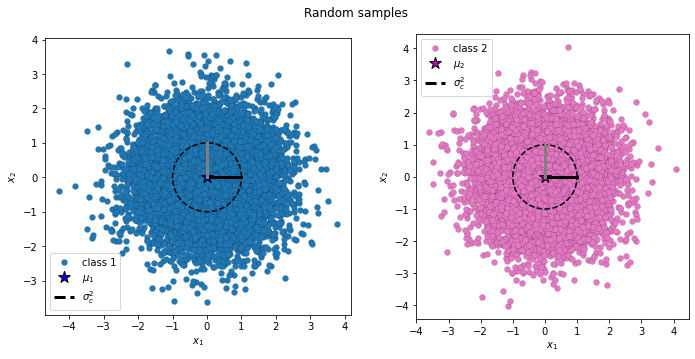

In [33]:
visualize_white_space(samples, white_means, white_eigenvalues, white_eigenvectors, title="Random samples", save_name=None, figsize=(10, 5), norm="2")

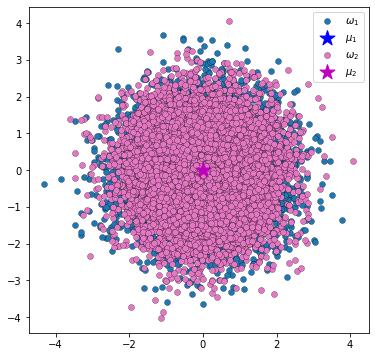

In [34]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
sample_colors = ("tab:blue", "tab:pink")
mean_colors = ("b", "m")
for c in range(C):
    ax.scatter(samples[c, :, 0], samples[c, :, 1], label=f"$\omega_{c+1}$", c=sample_colors[c], linewidth=.25, edgecolor="black")
    ax.scatter(0, 0, marker="*", s=250, label=f"$\mu_{c+1}$", c=mean_colors[c])
ax.set_aspect(1)
ax.legend()
plt.show()

### Whitening Transformation
$$ \mathbf{Y} = \Lambda^{-\frac{1}{2}} \Phi^{\mathsf{T}} \mathbf{X} $$

### Dewhitening Transformation
$$ \Lambda^{\frac{1}{2}} \mathbf{Y} = \Lambda^{\frac{1}{2}} \Lambda^{-\frac{1}{2}} \Phi^{\mathsf{T}} \mathbf{X} $$
$$ \Lambda^{\frac{1}{2}} \mathbf{Y} = \mathbf{I} \Phi^{\mathsf{T}} \mathbf{X} $$
$$ \Lambda^{\frac{1}{2}} \mathbf{Y} = \Phi^{\mathsf{T}} \mathbf{X} $$
$$ (\Phi^{\mathsf{T}})^{-1} \Lambda^{\frac{1}{2}} \mathbf{Y} = (\Phi^{\mathsf{T}})^{-1} \Phi^{\mathsf{T}} \mathbf{X} $$
$$ (\Phi^{\mathsf{T}})^{-1} \Lambda^{\frac{1}{2}} \mathbf{Y} = \mathbf{I} \mathbf{X} $$
$$ (\Phi^{\mathsf{T}})^{-1} \Lambda^{\frac{1}{2}} \mathbf{Y} = \mathbf{X} $$
$$ \Phi^{\mathsf{T}} \Lambda^{\frac{1}{2}} \mathbf{Y} = \mathbf{X} $$
$$ \Phi \Lambda^{\frac{1}{2}} \mathbf{Y} = \mathbf{X} $$

In [35]:
def dewhiten(x, mean, eigenvalues, eigenvectors):
    squishing_matrix = np.sqrt(identity(len(eigenvalues)) * eigenvalues)
    y = eigenvectors @ squishing_matrix @ x
    y += mean
    return y

In [36]:
dewhitened_samples = np.zeros_like(samples)

for c in range(C):
    dewhitened_samples[c] = np.array([dewhiten(s, means[c], eigenvalues[c], eigenvectors[c]) for s in samples[c]])

In [37]:
"dewhitened_samples.shape", dewhitened_samples.shape

('dewhitened_samples.shape', (2, 10000, 2))

In [38]:
def visualize_space(data, means, eigenvalues, eigenvectors, title=None, save_name=None, figsize=(10, 9), norm="2"):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    colors =  ("tab:blue", "tab:pink")
    mean_colors = ("b", "m")
    for c in range(C):
        # patterns
        ax.scatter(data[c, :, 0], data[c, :, 1], color=colors[c], label=f"class {c+1}", linewidth=.1, edgecolor="black")
        # mean
        mean_x, mean_y = means[c]
        ax.scatter(mean_x, mean_y, color=mean_colors[c], marker="*", edgecolor="black", s=150, linewidth=1, label=f"$\mu_{c+1}$")
        # variance
        theta = np.linspace(0, 2*np.pi, 100)

        major_idx = np.argmax(eigenvalues[c])
#         minor_idx = np.argmin(eigenvalues[c])
        # HOTFIX: argmax = argmin causes a problem
        minor_idx = 1 if major_idx == 0 else 0
        alpha = np.arctan2(eigenvectors[c, 1, major_idx], eigenvectors[c, 0, major_idx])
        major_r_x = eigenvalues[c, major_idx]
        major_r_y = eigenvalues[c, minor_idx]

        e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + mean_x
        e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + mean_y
        ax.plot(e_X, e_Y, color="black", linestyle="--")

        axis_colors = ["black", "grey"]
        ax.plot([mean_x, mean_x+eigenvalues[c, major_idx]*eigenvectors[c, 0, major_idx]], [mean_y, mean_y+eigenvalues[c, major_idx]*eigenvectors[c, 1, major_idx]], linewidth=3, color=axis_colors[0])
        ax.plot([mean_x, mean_x+eigenvalues[c, minor_idx]*eigenvectors[c, 0, minor_idx]], [mean_y, mean_y+eigenvalues[c, minor_idx]*eigenvectors[c, 1, minor_idx]], linewidth=3, color=axis_colors[1])

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")

    handles, labels = ax.get_legend_handles_labels()
    handles.append(Line2D([0], [0], color="black", linewidth=3, linestyle='--'))
    labels.append("$\sigma^2_{c}$")
    
    ax.set_aspect(1)

    plt.legend(handles, labels)
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    if save_name is not None:
        plt.savefig(save_name, dpi=300)

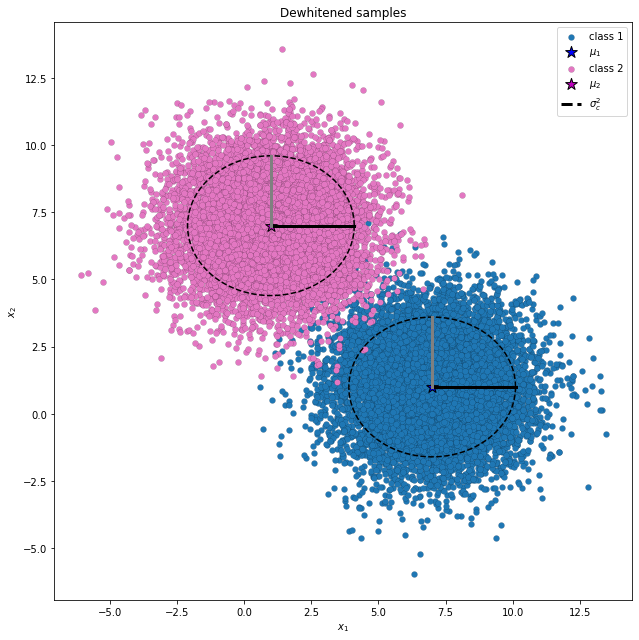

In [39]:
visualize_space(dewhitened_samples, means, eigenvalues, eigenvectors, title="Dewhitened samples", save_name=None, norm="2")

## Question D
d) derive the decision boundary and plot this boundary on top of the generated samples.

#### Discriminant function:
$$ g_i(x) = -\frac{1}{2}(x-\mu_i)^t\Sigma_i^{-1}(x-\mu_i)-\frac{d}{2}\ln (2\pi) - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i) $$

#### Decision boundary:
$$ g_i(x) = g_j(x) $$
$$ -\frac{1}{2}(x-\mu_i)^t\Sigma_i^{-1}(x-\mu_i)-\frac{d}{2}\ln (2\pi) - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i) = -\frac{1}{2}(x-\mu_j)^t\Sigma_j^{-1}(x-\mu_j)-\frac{d}{2}\ln (2\pi) - \frac{1}{2} \ln |\Sigma_j| + \ln P(\omega_j) $$
$$ -\frac{1}{2}(x-\mu_i)^t\Sigma_i^{-1}(x-\mu_i) - \frac{1}{2} \ln |\Sigma_i| + \ln P(\omega_i) = -\frac{1}{2}(x-\mu_j)^t\Sigma_j^{-1}(x-\mu_j) - \frac{1}{2} \ln |\Sigma_j| + \ln P(\omega_j) $$
From $\Sigma_1 = \Sigma_2$,
$$ -\frac{1}{2}(x-\mu_i)^t\Sigma_i^{-1}(x-\mu_i) + \ln P(\omega_i) = -\frac{1}{2}(x-\mu_j)^t\Sigma_j^{-1}(x-\mu_j) + \ln P(\omega_j) $$
$$ -\frac{1}{2}\left[ x^{\mathsf{T}}\Sigma_i^{-1} x - 2\mu_i^{\mathsf{T}}\Sigma_i^{-1}x + \mu_i^{\mathsf{T}}\Sigma_i^{-1}\mu_i \right] + \ln P(\omega_i) = -\frac{1}{2}\left[ x^{\mathsf{T}}\Sigma_j^{-1} x - 2\mu_j^{\mathsf{T}}\Sigma_j^{-1}x + \mu_j^{\mathsf{T}}\Sigma_j^{-1}\mu_j \right] + \ln P(\omega_j) $$
$$ -\frac{1}{2} x^{\mathsf{T}}\Sigma_i^{-1} x +\frac{1}{2} 2\mu_i^{\mathsf{T}}\Sigma_i^{-1}x -\frac{1}{2}\mu_i^{\mathsf{T}}\Sigma_i^{-1}\mu_i + \ln P(\omega_i) = -\frac{1}{2} x^{\mathsf{T}}\Sigma_j^{-1} x + \frac{1}{2} 2\mu_j^{\mathsf{T}}\Sigma_j^{-1}x -\frac{1}{2} \mu_j^{\mathsf{T}}\Sigma_j^{-1}\mu_j + \ln P(\omega_j) $$
From $\Sigma_1 = \Sigma_2$,
$$ \frac{1}{2} 2\mu_i^{\mathsf{T}}\Sigma_i^{-1}x -\frac{1}{2}\mu_i^{\mathsf{T}}\Sigma_i^{-1}\mu_i + \ln P(\omega_i) = \frac{1}{2} 2\mu_j^{\mathsf{T}}\Sigma_j^{-1}x -\frac{1}{2} \mu_j^{\mathsf{T}}\Sigma_j^{-1}\mu_j + \ln P(\omega_j) $$
$$ \mu_i^{\mathsf{T}}\Sigma_i^{-1}x -\frac{1}{2}\mu_i^{\mathsf{T}}\Sigma_i^{-1}\mu_i + \ln P(\omega_i) = \mu_j^{\mathsf{T}}\Sigma_j^{-1}x -\frac{1}{2} \mu_j^{\mathsf{T}}\Sigma_j^{-1}\mu_j + \ln P(\omega_j) $$
Let $i=1$ and $j=2$, and from $P(\omega_1) = 4P(\omega_2)$, we get
$$ \mu_i^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 + \ln 4P(\omega_2) = \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 + \ln P(\omega_2) $$
$$ \mu_i^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 + \ln 4P(\omega_2) - \ln P(\omega_2) = \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 $$
$$ \mu_i^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 + \ln \frac{4P(\omega_2)}{P(\omega_2)} = \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 $$
$$ \mu_i^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 + \ln 4 = \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 $$
From $\mu_1 = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$, $\mu_2 = \begin{bmatrix} 1 \\ 7 \end{bmatrix}$,
From $\Sigma_1 = \Sigma_2 = \begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}$,
$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}^{-1}\vec{x} -\frac{1}{2}\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}^{-1}\begin{bmatrix} 7 \\ 1 \end{bmatrix} + \ln 4 = \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}^{-1}\vec{x} -\frac{1}{2} \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 3.1 & 0 \\ 0 & 2.6 \end{bmatrix}^{-1}\begin{bmatrix} 1 \\ 7 \end{bmatrix} $$

$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\vec{x} -\frac{1}{2}\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} 7 \\ 1 \end{bmatrix} + \ln 4 = \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\vec{x} -\frac{1}{2} \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} 1 \\ 7 \end{bmatrix} $$
$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2}\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} 7 \\ 1 \end{bmatrix} + \ln 4 = \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2} \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} 1 \\ 7 \end{bmatrix} $$
$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2}\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{7}{3.1} \\ \frac{1}{2.6} \end{bmatrix} + \ln 4 
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2} \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} \\  \frac{7}{2.6} \end{bmatrix} $$

$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2} (\frac{7 \cdot 7}{3.1} + \frac{1 \cdot 1}{2.6}) + \ln 4 
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2} (\frac{1 \cdot 1}{3.1} + \frac{7 \cdot 7}{2.6}) $$

In [40]:
def calc(expr):
    ans = eval(expr)
    print(f"{expr} = {ans:.4f}")

In [41]:
calc("-0.5 * transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0]")
calc("-0.5 * transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1]")

-0.5 * transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0] = -8.0955
-0.5 * transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1] = -9.5844


$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 8.0955 + \ln 4 
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 9.5844 $$

In [42]:
calc("(-0.5 * transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0]) + np.log(4) + (0.5 * transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1])")

(-0.5 * transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0]) + np.log(4) + (0.5 * transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1]) = 2.8751


$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 2.8751
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{1}{3.1} & 0 \\ 0 & \frac{1}{2.6} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$
$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} \frac{x_1}{3.1} \\ \frac{x_2}{2.6} \end{bmatrix} + 2.8751
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} \frac{x_1}{3.1} \\ \frac{x_2}{2.6} \end{bmatrix} $$
$$ \frac{7 \cdot x_1}{3.1} + \frac{x_2}{2.6} + 2.8751
= \frac{x_1}{3.1} + \frac{7 \cdot x_2}{2.6} $$

Multiply both sides by $3.1 \times 2.6 = 8.06$,
$$ (2.6 \cdot 7 \cdot x_1) + (3.1 \cdot x_2) + (8.06 \cdot 2.8751) = (2.6 \cdot x_1) + (3.1 \cdot 7 \cdot x_2) $$

In [43]:
calc("8.06 * 2.8751")

8.06 * 2.8751 = 23.1733


$$ 18.2 x_1 + 3.1x_2 + 23.1733 = 2.6 x_1 + 21.7 x_2 $$
$$ 15.6 x_1 + 23.1733 = 18.6 x_2 $$

In [44]:
calc("23.1733 / 18.6")

23.1733 / 18.6 = 1.2459


$$ 0.8387x_1 + 1.2459 = x_2 $$

In [45]:
def decision_boundary(x1):
    return (0.8387 * x1) + 1.2459

## Likelihood

In [46]:
def multivariate_normal(x, mean, cov):
    d = len(x)
    return (np.exp(-(0.5) * (transpose(x - mean) @ inverse_matrix(cov) @ (x - mean)))) / np.sqrt(((2 * np.pi) ** d) * determinant(cov))

In [47]:
def beautify_3d(ax):
    ax.grid(False)
    z_ticks = [t for t in ax.get_zticks() if t >= 0]
    ax.set_zticks(z_ticks)
    
    ax.xaxis.pane.set_edgecolor('black')
    ax.yaxis.pane.set_edgecolor('black')
    ax.zaxis.pane.set_edgecolor('black')
    
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    
    ax.xaxis._axinfo['tick']['inward_factor'] = 0
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.3
    ax.yaxis._axinfo['tick']['inward_factor'] = 0
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.3
    ax.zaxis._axinfo['tick']['inward_factor'] = 0
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.3
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.3

In [48]:
def visualize_3d(samples, means, cov, eigenvalues, eigenvectors, db, title=None, figsize=(12, 12), offset=-0.5):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    surface_colors = ("gray", "Reds")
    mean_colors = ("k", "r")
    cov_colors = ("gray", "red")
    
    x_min = samples[:, :, 0].min()
    x_max = samples[:, :, 0].max()
    
    y_min = samples[:, :, 1].min()
    y_max = samples[:, :, 1].max()
    
    x = np.arange(x_min, x_max, .4)
    y = np.arange(y_min, y_max, .4)
    X, Y = np.meshgrid(x, y)

    ZZ = []
    C_values = []
    for c in range(C):
        zs = np.array([multivariate_normal(s, means[c], cov[c]) for s in np.array(list(zip(np.ravel(X), np.ravel(Y))))])
        ZZ.append(zs.reshape(X.shape))
    
        discriminant_values = np.zeros((X.shape[0], X.shape[1]))
        for ix in range(X.shape[0]):
            for iy in range(X.shape[1]):
                xx = X[ix][iy]
                yy = Y[ix][iy]
                discriminant_values[ix, iy] = discriminant_fx(np.array([xx, yy]), means[c], cov[c], priors[c])
        C_values.append(discriminant_values)
    
    ZZ = np.array(ZZ)
    Z = np.max(ZZ, axis=0)
    
    color_values = np.zeros((X.shape[0], X.shape[1]))
    C_values = np.array(C_values)
    color_values = C_values[1] - C_values[0]
    color_values[color_values > 0] = 1
#     color_values[color_values == 0] = 0.5
    color_values[color_values < 0] = 0
    facecolors = cm.get_cmap("Reds")(color_values/np.amax(color_values + 0.5))
#     norm = matplotlib.colors.Normalize(vmin=color_values.min(), vmax=color_values.max())
#     facecolors = cm.get_cmap("Reds")(norm(color_values))
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, antialiased=True, facecolors=facecolors, shade=True, linewidth=.5, edgecolor="black")
    surf.set_edgecolor('k')
#     for c in range(C):
#         ax.plot_surface(X, Y, C_values[c])

    for c in range(C):
#         ax.scatter(samples[c, :, 0], samples[c, :, 1], offset, alpha=0.02, c=mean_colors[c])
        ax.scatter(means[c, 0], means[c, 1], offset, marker="*", s=250, label=f"$\mu_{c+1}$", c=mean_colors[c])

        theta = np.linspace(0, 2*np.pi, 100)

        major_idx = np.argmax(eigenvalues[c])
    #         minor_idx = np.argmin(eigenvalues[c])
        # HOTFIX: argmax = argmin causes a problem
        minor_idx = 1 if major_idx == 0 else 0
        alpha = np.arctan2(eigenvectors[c, 1, major_idx], eigenvectors[c, 0, major_idx])
        major_r_x = eigenvalues[c, major_idx]
        major_r_y = eigenvalues[c, minor_idx]

        e_X = major_r_x * np.cos(theta) * np.cos(alpha) - major_r_y * np.sin(theta) * np.sin(alpha) + means[c, 0]
        e_Y = major_r_x * np.cos(theta) * np.sin(alpha) + major_r_y * np.sin(theta) * np.cos(alpha) + means[c, 1]
        e_Z = np.zeros_like(e_X) + offset
        ax.plot(e_X, e_Y, e_Z, color=cov_colors[c], linestyle="-")
        
        ax.text(means[c, 0], means[c, 1], offset, "$P(\omega_" + str(c+1) + ")=" + f"{priors[c]:.2f}" + "$")

    # decision boundary from equation
    x = np.ravel(X)
    y = db(x)
    ax.plot(x, y, offset, label="Decision boundary", color="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("Likelihood $p(x|\omega_i)$")

    ax.legend()
    
    beautify_3d(ax)
    
    ax.view_init(azim=45, elev=15)
    
    if title is not None:
        plt.suptitle(title)
    plt.show()

1.0


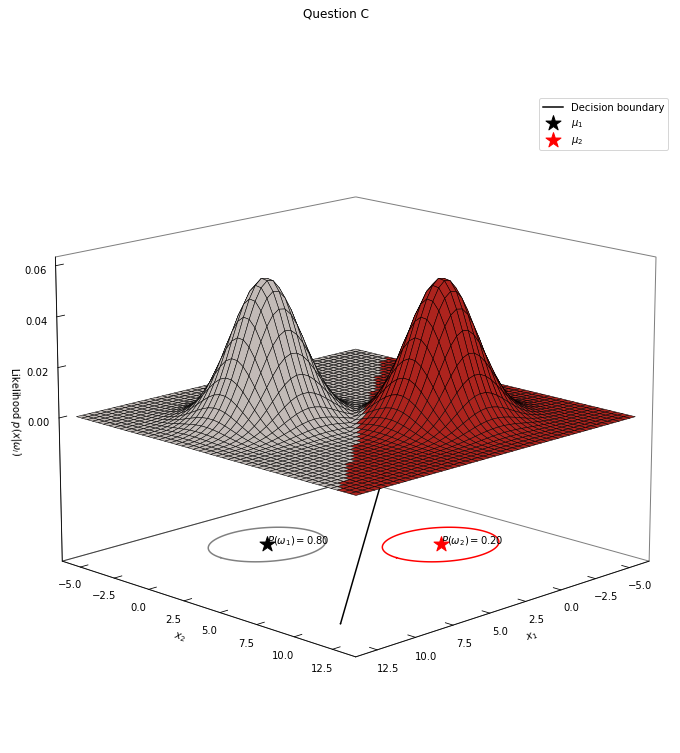

In [49]:
visualize_3d(dewhitened_samples, means, cov, eigenvalues, eigenvectors, db=decision_boundary, title="Question C", offset=-0.05)

## Question E
e) plot the posterior probabilities.

### Posterior probability

$$ P(\omega_i | \vec{x}) = \frac{p(\vec{x} | \omega_i) P(\omega_i)}{p(\vec{x})} $$

where the evidence is defined as:

$$ p(\vec{x}) = \sum_{j=1}^{C} p(\vec{x} | \omega_i) P(\omega_i) $$

(in this case $C = 2$)

In [50]:
def visualize_posterior(samples, means, eigenvalues, eigenvectors, priors, title=None, figsize=(12, 12), offset=0):
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    surface_colors = ("gray", "red")
    
    x_min = samples[:, :, 0].min()
    x_max = samples[:, :, 0].max()
    
    y_min = samples[:, :, 1].min()
    y_max = samples[:, :, 1].max()
    
    x = np.arange(x_min, x_max, .5)
    y = np.arange(y_min, y_max, .5)
    X, Y = np.meshgrid(x, y)

    ZZ = []
    C_values = []
    for c in range(C):
        zs = np.array([multivariate_normal(s, means[c], cov[c]) for s in np.array(list(zip(np.ravel(X), np.ravel(Y))))])
        zs *= priors[c]
        
        ZZ.append(zs.reshape(X.shape))
    
        color_values = np.zeros((X.shape[0], X.shape[1]))
        for ix in range(X.shape[0]):
            for iy in range(X.shape[1]):
                xx = X[ix][iy]
                yy = Y[ix][iy]
                color_values[ix, iy] = discriminant_fx(np.array([xx, yy]), means[c], cov[c], priors[c])
        C_values.append(color_values)
    
    ZZ = np.array(ZZ)
    evidence = np.sum(ZZ, axis=0)
    ZZ = ZZ / evidence
    Z = np.max(ZZ, axis=0)
    
    C_values = np.array(C_values)
    color_values = C_values[1] - C_values[0]
    color_values[color_values > 0] = 1
    color_values[color_values < 0] = 0
#     norm = matplotlib.colors.Normalize(vmin=color_values.min(), vmax=color_values.max())
#     facecolors = cm.get_cmap("Reds")(norm(color_values))
    facecolors = cm.get_cmap("Reds")(color_values/np.amax(color_values + 0.5))
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, antialiased=True, facecolors=facecolors, shade=True, linewidth=.5, edgecolor="black")
    surf.set_edgecolor('k')
    
    # texts
    for c, Z in enumerate(ZZ):
        p_z = np.max(Z)
        ix, iy = np.where(Z == p_z)
        p_x = X[ix[0], iy[0]]
        p_y = Y[ix[0], iy[0]]
        ax.text(p_x, p_y, p_z, "$\omega_" + str(c+1) + "$", fontsize=18)

    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("Posterior $P(\omega_i|x)$")
    
    beautify_3d(ax)
    ax.view_init(azim=45, elev=15)

    if title is not None:
        plt.suptitle(title)
        
    plt.show()

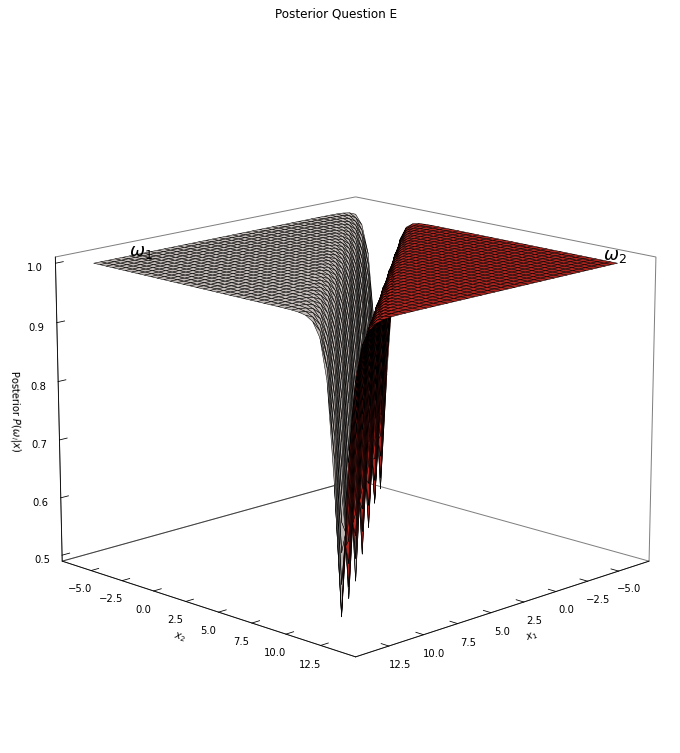

In [51]:
visualize_posterior(dewhitened_samples, means, eigenvalues, eigenvectors, priors, title="Posterior Question E", offset=1)

<hr />

## Question F
f) redo part c), d) and e) using the same parameters except for $\Sigma_1 = \Sigma_2 = \begin{bmatrix} 3.1 & 0.35 \\ 0.35 & 2.6 \end{bmatrix}$

In [52]:
cov = np.zeros((C, d, d))

for c in range(C):
    cov[c]= np.array([[3.1, 0.35], [0.35, 2.6]])
    
"Sigma1, Sigma2 =", cov

('Sigma1, Sigma2 =',
 array([[[3.1 , 0.35],
         [0.35, 2.6 ]],
 
        [[3.1 , 0.35],
         [0.35, 2.6 ]]]))

In [53]:
eigenvalues = np.zeros((C, d))

for c in range(C):
    eigenvalues[c] = compute_eigenvalues(cov[c])
    
"eigenvalues", eigenvalues

('eigenvalues',
 array([[2.41988374, 3.28011626],
        [2.41988374, 3.28011626]]))

In [54]:
eigenvectors = np.zeros((C, d, d))

for c in range(C):
    for i in range(len(eigenvalues)):
        eigenvectors[c] = compute_eigenvector(cov[c], eigenvalues[c])
        
"eigenvectors", eigenvectors

('eigenvectors',
 array([[[-0.45758158,  0.88916764],
         [ 0.88916764,  0.45758158]],
 
        [[-0.45758158,  0.88916764],
         [ 0.88916764,  0.45758158]]]))

In [55]:
samples = normal_random(C, N, d)
"samples.shape", samples.shape

('samples.shape', (2, 10000, 2))

In [56]:
dewhitened_samples = np.zeros_like(samples)

for c in range(C):
    dewhitened_samples[c] = np.array([dewhiten(s, means[c], eigenvalues[c], eigenvectors[c]) for s in samples[c]])
    
"dewhitened_samples.shape", dewhitened_samples.shape

('dewhitened_samples.shape', (2, 10000, 2))

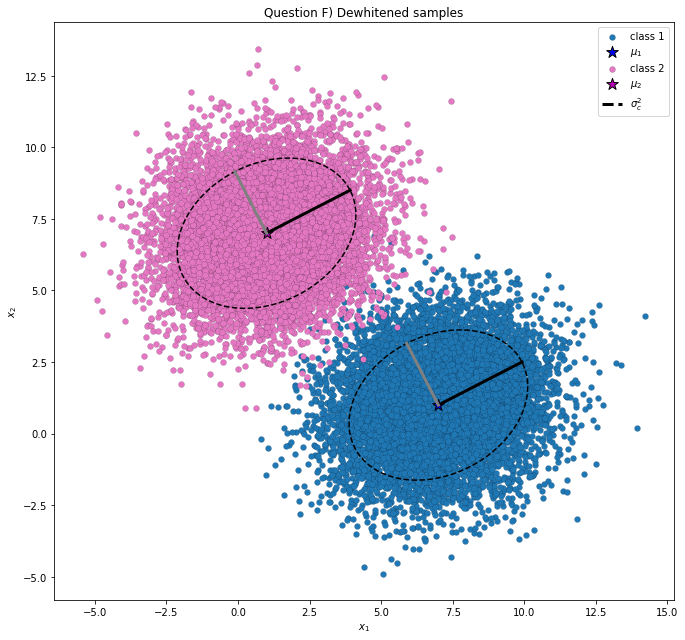

In [57]:
visualize_space(dewhitened_samples, means, eigenvalues, eigenvectors, title="Question F) Dewhitened samples", save_name=None, norm="2")

### Decision boundary

In [58]:
inverse_matrix(cov[0])

array([[ 0.32755906, -0.04409449],
       [-0.04409449,  0.39055118]])

Just like the equation of the previous question, but with different covariance matrix:

$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2}\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} 7 \\ 1 \end{bmatrix} + \ln 4 
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -\frac{1}{2} \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} 1 \\ 7 \end{bmatrix} $$

In [59]:
calc("-0.5 * (transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0])")

-0.5 * (transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0]) = -7.9118


In [60]:
calc("-0.5 * (transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1])")

-0.5 * (transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1]) = -9.4236


$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} -7.9118 + \ln 4 
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} - 9.4236 $$

In [61]:
calc("(-0.5 * (transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0])) + np.log(4) - (-0.5 * (transpose(means[1]) @ inverse_matrix(cov[0]) @ means[1]))")

(-0.5 * (transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0])) + np.log(4) - (-0.5 * (transpose(means[1]) @ inverse_matrix(cov[0]) @ means[1])) = 2.8981


$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + 2.8981
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.3276 & -0.0441 \\ -0.0441 & 0.3906 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} $$

$$ \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.3276x_1 -0.0441x_2 \\ -0.0441x_1 + 0.3906x_2 \end{bmatrix} + 2.8981
= \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.3276x_1 -0.0441x_2 \\ -0.0441x_1 + 0.3906x_2 \end{bmatrix} $$

$$ 7(0.3276x_1 -0.0441x_2) + 1(-0.0441x_1 + 0.3906x_2) + 2.8981 = 1(0.3276x_1 -0.0441x_2) + 7(-0.0441x_1 + 0.3906x_2)$$

In [62]:
calc("7 * 0.3276")
calc("7 * -0.0441")

calc("7 * -0.0441")
calc("7 * 0.3906")

7 * 0.3276 = 2.2932
7 * -0.0441 = -0.3087
7 * -0.0441 = -0.3087
7 * 0.3906 = 2.7342


$$ 2.2932x_1 - 0.3087x_2 -0.0441x_1 + 0.3906x_2 + 2.8981 = 0.3276x_1 - 0.0441x_2 -0.3087x_1 + 2.7342x_2 $$

$$ - 0.3087x_2 + 0.3906x_2 + 0.0441x_2 - 2.7342x_2 + 2.8981 = 0.3276x_1 -0.3087x_1 - 2.2932x_1 + 0.0441x_1 $$

$$ (- 0.3087 + 0.3906 + 0.0441 - 2.7342)x_2 = (0.3276 + -0.3087 - 2.2932 + 0.0441)x_1 - 2.8981 $$

In [63]:
calc("-0.3087+0.3906+0.0441-2.7342")
calc("0.3276-0.3087-2.2932+0.0441")

-0.3087+0.3906+0.0441-2.7342 = -2.6082
0.3276-0.3087-2.2932+0.0441 = -2.2302


$$ -2.6082x_2 = -2.2302x_1 - 2.8981 $$

In [64]:
calc("-2.2302 / -2.6082")
calc("-2.8981 / -2.6082")

-2.2302 / -2.6082 = 0.8551
-2.8981 / -2.6082 = 1.1111


$$ x_2 = 0.8551x_1 + 1.1111 $$

In [65]:
def decision_boundary_f(x1):
    return (0.8551 * 𝑥1) + 1.1111

1.0


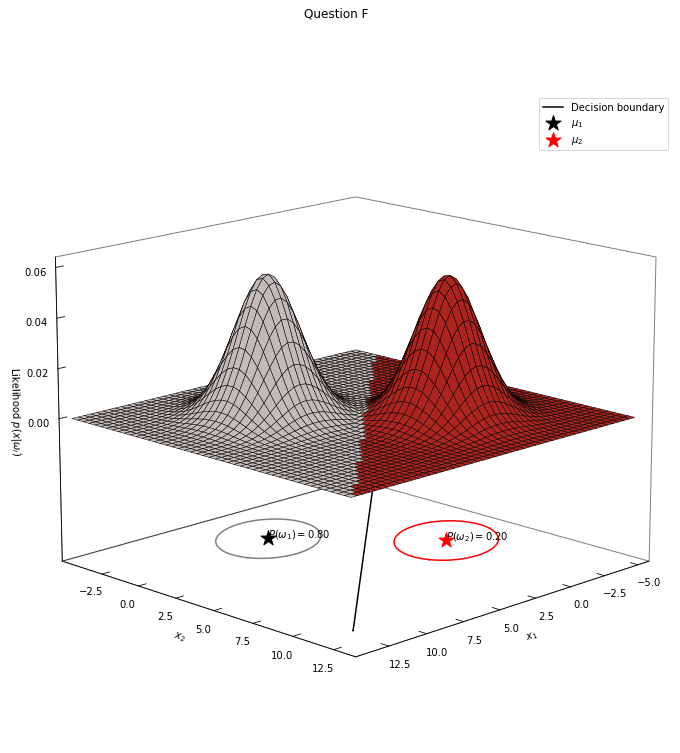

In [66]:
visualize_3d(dewhitened_samples, means, cov, eigenvalues, eigenvectors, db=decision_boundary_f, title="Question F", offset=-0.05)

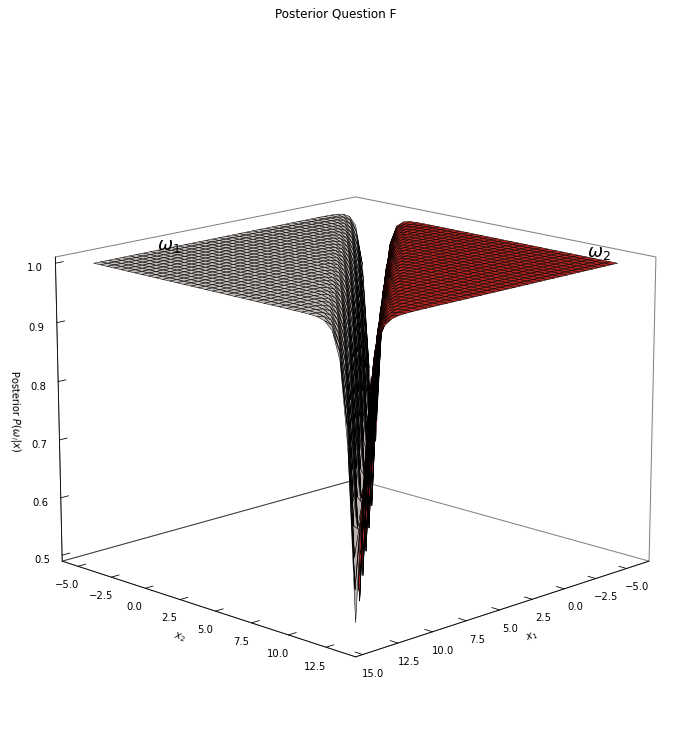

In [67]:
visualize_posterior(dewhitened_samples, means, eigenvalues, eigenvectors, priors, title="Posterior Question F", offset=1)

<hr />

## Question G
g) redo part c), d) and e) for $\Sigma_1 = \begin{bmatrix} 2.1 & 1.5 \\ 1.5 & 3.8 \end{bmatrix}$, $\Sigma_2 = \begin{bmatrix} 3.1 & 0.35 \\ 0.35 & 2.6 \end{bmatrix}$ and $P(\omega_1) = 2 \times P(\omega_2)$

In [68]:
cov = np.zeros((C, d, d))

cov[0] = [[2.1, 1.5], [1.5, 3.8]]
cov[1] = [[3.1, 0.35], [0.35, 2.6]]

"cov", cov

('cov',
 array([[[2.1 , 1.5 ],
         [1.5 , 3.8 ]],
 
        [[3.1 , 0.35],
         [0.35, 2.6 ]]]))

In [69]:
priors = [2/3, 1/3]

"priors", priors

('priors', [0.6666666666666666, 0.3333333333333333])

In [70]:
eigenvalues = np.zeros((C, d))

for c in range(C):
    eigenvalues[c] = compute_eigenvalues(cov[c])
    
"eigenvalues", eigenvalues

('eigenvalues',
 array([[1.22590604, 4.67409396],
        [2.41988374, 3.28011626]]))

In [71]:
eigenvectors = np.zeros((C, d, d))

for c in range(C):
    for i in range(len(eigenvalues)):
        eigenvectors[c] = compute_eigenvector(cov[c], eigenvalues[c])
        
"eigenvectors", eigenvectors

('eigenvectors',
 array([[[-0.86400595,  0.50348159],
         [ 0.50348159,  0.86400595]],
 
        [[-0.45758158,  0.88916764],
         [ 0.88916764,  0.45758158]]]))

In [72]:
samples = normal_random(C, N, d)
"samples.shape", samples.shape

('samples.shape', (2, 10000, 2))

In [73]:
dewhitened_samples = np.zeros_like(samples)

for c in range(C):
    dewhitened_samples[c] = np.array([dewhiten(s, means[c], eigenvalues[c], eigenvectors[c]) for s in samples[c]])

"dewhitened_samples.shape", dewhitened_samples.shape

('dewhitened_samples.shape', (2, 10000, 2))

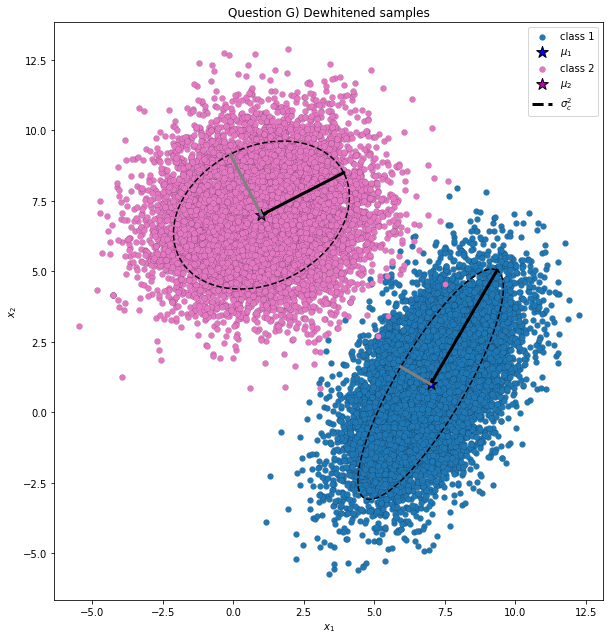

In [74]:
visualize_space(dewhitened_samples, means, eigenvalues, eigenvectors, title="Question G) Dewhitened samples", save_name=None, norm="2")

### Decision boundary

$$ g_i(x) = g_j(x) $$

$$ -\frac{1}{2} x^{\mathsf{T}}\Sigma_i^{-1} x +\frac{1}{2} 2\mu_i^{\mathsf{T}}\Sigma_i^{-1}x -\frac{1}{2}\mu_i^{\mathsf{T}}\Sigma_i^{-1}\mu_i - \frac{1}{2} \ln|\Sigma_i| + \ln P(\omega_i) 
= -\frac{1}{2} x^{\mathsf{T}}\Sigma_j^{-1} x + \frac{1}{2} 2\mu_j^{\mathsf{T}}\Sigma_j^{-1}x -\frac{1}{2} \mu_j^{\mathsf{T}}\Sigma_j^{-1}\mu_j - \frac{1}{2} \ln|\Sigma_j| + \ln P(\omega_j) $$

$$ -\frac{1}{2} x^{\mathsf{T}}\Sigma_1^{-1} x + \mu_1^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 - \frac{1}{2} \ln|\Sigma_1| + \ln \frac{2P(\omega_2)}{P(\omega_2)}
= -\frac{1}{2} x^{\mathsf{T}}\Sigma_2^{-1} x + \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 - \frac{1}{2} \ln|\Sigma_2| $$

$$ -\frac{1}{2} x^{\mathsf{T}}\Sigma_1^{-1} x + \mu_1^{\mathsf{T}}\Sigma_1^{-1}x -\frac{1}{2}\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 - \frac{1}{2} \ln|\Sigma_1| + \ln 2
= -\frac{1}{2} x^{\mathsf{T}}\Sigma_2^{-1} x + \mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\frac{1}{2} \mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 - \frac{1}{2} \ln|\Sigma_2|$$

$$ -x^{\mathsf{T}}\Sigma_1^{-1} x + 2\mu_1^{\mathsf{T}}\Sigma_1^{-1}x -\mu_1^{\mathsf{T}}\Sigma_1^{-1}\mu_1 - \ln|\Sigma_1| + 2\ln 2
= -x^{\mathsf{T}}\Sigma_2^{-1} x + 2\mu_2^{\mathsf{T}}\Sigma_2^{-1}x -\mu_2^{\mathsf{T}}\Sigma_2^{-1}\mu_2 - \ln|\Sigma_2|$$

In [75]:
inverse_matrix(cov[0])

array([[ 0.66317627, -0.2617801 ],
       [-0.2617801 ,  0.36649215]])

In [76]:
inverse_matrix(cov[1])

array([[ 0.32755906, -0.04409449],
       [-0.04409449,  0.39055118]])

In [77]:
calc("- np.log(determinant(cov[0]))")
calc("- np.log(determinant(cov[1]))")

- np.log(determinant(cov[0])) = -1.7457
- np.log(determinant(cov[1])) = -2.0716


$$ -\begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.66317627 & -0.2617801 \\ -0.2617801 & 0.36649215 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
+ 2\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.66317627 & -0.2617801 \\ -0.2617801 & 0.36649215 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
- \begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.66317627 & -0.2617801 \\ -0.2617801 & 0.36649215 \end{bmatrix}\begin{bmatrix} 7 \\ 1 \end{bmatrix}
- 1.7457
+ 2\ln 2 
= 
- \begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.32755906 & -0.04409449 \\ -0.04409449 & 0.39055118 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
+ 2\begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.32755906 & -0.04409449 \\ -0.04409449 & 0.39055118 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
- \begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.32755906 & -0.04409449 \\ -0.04409449 & 0.39055118 \end{bmatrix}\begin{bmatrix} 1 \\ 7 \end{bmatrix} 
- 2.0716 $$

In [78]:
calc("- transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0]")

- transpose(means[0]) @ inverse_matrix(cov[0]) @ means[0] = -29.1972


In [79]:
calc("- transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1]")

- transpose(means[1]) @ inverse_matrix(cov[1]) @ means[1] = -18.8472


$$
-\begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.66317627 & -0.2617801 \\ -0.2617801 & 0.36649215 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
+ 2\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.66317627 & -0.2617801 \\ -0.2617801 & 0.36649215 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
- 29.1972
- 1.7457
+ 2\ln 2 
=
- \begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.32755906 & -0.04409449 \\ -0.04409449 & 0.39055118 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} 
+ 2\begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.32755906 & -0.04409449 \\ -0.04409449 & 0.39055118 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
- 18.8472
- 2.0716
$$

In [80]:
calc("-29.1972  -1.7457 + (2 * np.log(2)) + 18.8472 + 2.0716")

-29.1972  -1.7457 + (2 * np.log(2)) + 18.8472 + 2.0716 = -8.6378


$$
-\begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.66317627x_1 -0.2617801x_2 \\ -0.2617801x_1 + 0.36649215x_2 \end{bmatrix}
+ 2\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.66317627x_1 -0.2617801x_2 \\ -0.2617801x_1 + 0.36649215x_2 \end{bmatrix}
- 8.6378
=
- \begin{bmatrix} x_1 & x_2 \end{bmatrix}\begin{bmatrix} 0.32755906x_1 & -0.04409449x_2 \\ -0.04409449x_1 & 0.39055118x_2 \end{bmatrix}
+ 2\begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.32755906x_1 -0.04409449x_2 \\ -0.04409449x_1 + 0.39055118x_2 \end{bmatrix}
$$

$$
-(0.66317627x_1^2 -0.2617801x_2^2 + -0.2617801x_1^2 + 0.36649215x_2^2)
+ 2\begin{bmatrix} 7 & 1 \end{bmatrix}\begin{bmatrix} 0.66317627x_1 -0.2617801x_2 \\ -0.2617801x_1 + 0.36649215x_2 \end{bmatrix}
- 8.6378
=
-(0.32755906x_1^2 -0.04409449x_2^2 + -0.04409449x_1^2 + 0.39055118x_2^2)
+ 2\begin{bmatrix} 1 & 7 \end{bmatrix}\begin{bmatrix} 0.32755906x_1 -0.04409449x_2 \\ -0.04409449x_1 + 0.39055118x_2 \end{bmatrix}
$$

$$
-(0.66317627x_1^2 -0.2617801x_2^2 -0.2617801x_1^2 + 0.36649215x_2^2)
+ 14(0.66317627x_1 -0.2617801x_2) + 2(-0.2617801x_1 + 0.36649215x_2)
- 8.6378
=
-(0.32755906x_1^2 -0.04409449x_2^2 -0.04409449x_1^2 + 0.39055118x_2^2)
+ 2(0.32755906x_1 -0.04409449x_2) + 14(-0.04409449x_1 + 0.39055118x_2)
$$

In [81]:
calc("14 * 0.66317627")
calc("14 * -0.2617801")

calc("2 * -0.2617801")
calc("2 * 0.36649215")

calc("2 * 0.32755906")
calc("2 * -0.04409449")

calc("14 * -0.04409449")
calc("14 * 0.39055118")

14 * 0.66317627 = 9.2845
14 * -0.2617801 = -3.6649
2 * -0.2617801 = -0.5236
2 * 0.36649215 = 0.7330
2 * 0.32755906 = 0.6551
2 * -0.04409449 = -0.0882
14 * -0.04409449 = -0.6173
14 * 0.39055118 = 5.4677


$$
-0.66317627x_1^2 + 0.2617801x_2^2 + 0.2617801x_1^2 - 0.36649215x_2^2
+ 9.2845x_1 - 3.6649x_2 - 0.5236x_1 + 0.7330x_2
- 8.6378
=
-0.32755906x_1^2 + 0.04409449x_2^2 + 0.04409449x_1^2 - 0.39055118x_2^2
+ 0.6551x_1 -0.0882x_2 -0.6173x_1 + 5.4677x_2
$$

In [82]:
calc("-0.66317627 + 0.2617801 + 0.32755906 - 0.04409449")
calc("0.2617801 - 0.36649215 - 0.04409449 + 0.39055118")

calc("9.2845 - 0.5236 - 0.6551 + 0.6173")
calc("-3.6649 + 0.7330 + 0.0882 - 5.4677")

-0.66317627 + 0.2617801 + 0.32755906 - 0.04409449 = -0.1179
0.2617801 - 0.36649215 - 0.04409449 + 0.39055118 = 0.2417
9.2845 - 0.5236 - 0.6551 + 0.6173 = 8.7231
-3.6649 + 0.7330 + 0.0882 - 5.4677 = -8.3114


$$
-0.1179x_1^2 + 0.2417x_2^2  + 8.7231x_1 - 8.3114x_2 - 8.6378 = 0
$$

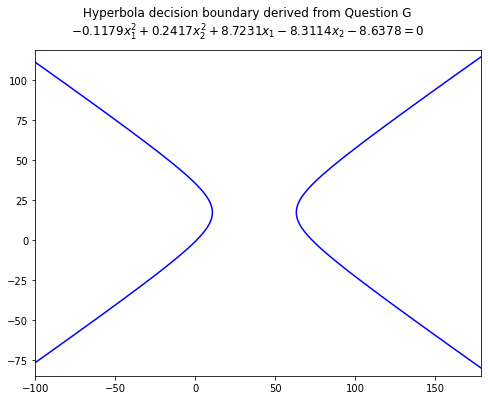

In [83]:
def hyperbola_decision_boundary(x, y):
    return -0.1179*(x**2) + 0.2417 * y**2 + 8.7231 * x - 8.3114 * y - 8.6378

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

X, Y = np.mgrid[-100:180, -85:120]
plt.contour(X, Y, hyperbola_decision_boundary(X, Y), levels=[0], colors="blue")
ax.set_aspect(1)
plt.suptitle("Hyperbola decision boundary derived from Question G\n$-0.1179x_1^2 + 0.2417x_2^2  + 8.7231x_1 - 8.3114x_2 - 8.6378 = 0$")
plt.show()

**Solution y**:
1. $ y \approx 0.000413736 \left(41557 - \sqrt{2849643 x_1^2 - 210837327 x_1 + 1935759875}\right) $

2. $ y \approx 0.000413736 \left(\sqrt{2849643 x_1^2 - 210837327 x_1 + 1935759875} + 41557\right) $


In [84]:
def decision_boundary_g(x1, which=1):
    if which == 1:
        return 0.000413736 * (41557 - np.sqrt(2849643 * (x1**2) - (210837327 * x1) + 1935759875))
    elif which == 2:
        return 0.000413736 * (np.sqrt(2849643 * (x1**2) - (210837327 * x1) + 1935759875) + 41557)
    return 0

1.0


<ipython-input-84-7926b5d033ca>:3: RuntimeWarning: invalid value encountered in sqrt
  return 0.000413736 * (41557 - np.sqrt(2849643 * (x1**2) - (210837327 * x1) + 1935759875))


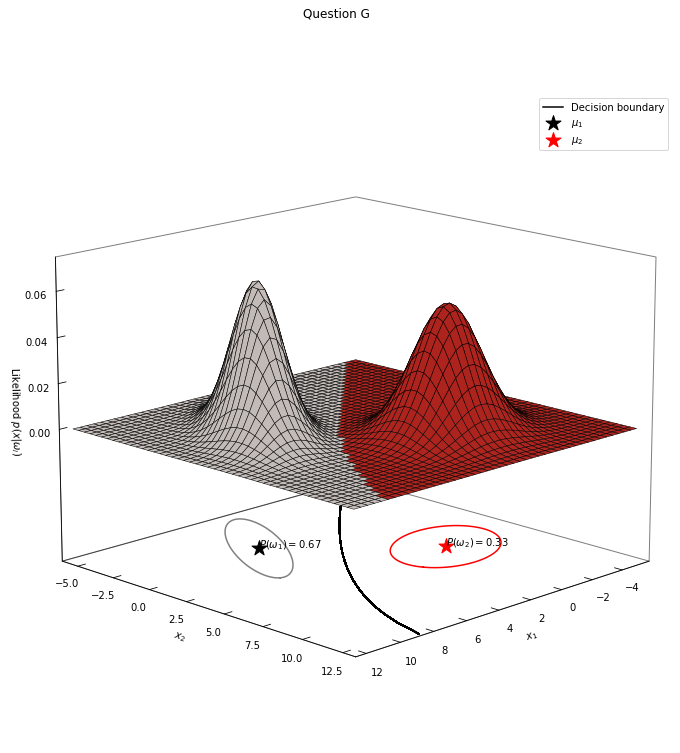

In [85]:
visualize_3d(dewhitened_samples, means, cov, eigenvalues, eigenvectors, db=decision_boundary_g, title="Question G", offset=-0.05)

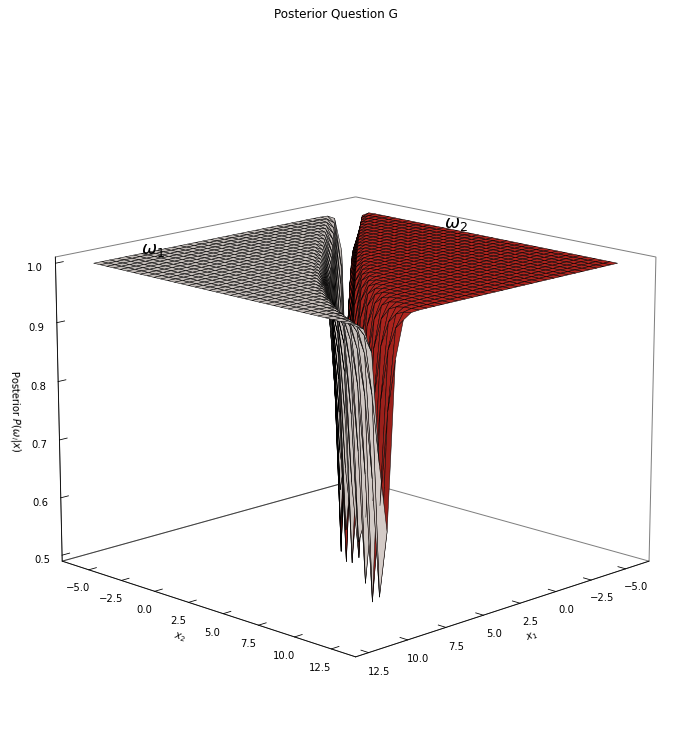

In [86]:
visualize_posterior(dewhitened_samples, means, eigenvalues, eigenvectors, priors, title="Posterior Question G", offset=1)